In [1]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
import pathlib

In [16]:
data=pd.read_csv(f"{pathlib.Path().resolve()}\\input\\cnn_dailymail\\train.csv", nrows=1000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   article     1000 non-null   object
 2   highlights  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [17]:
data.drop_duplicates(subset=['article'],inplace=True) #dropping duplicates
data.dropna(axis=0,inplace=True) #dropping na

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   article     1000 non-null   object
 2   highlights  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [19]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [20]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString).text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if (num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1: # removing short words
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [21]:
#call the function
cleaned_text = []
for t in data['article']:
    cleaned_text.append(text_cleaner(t,0)) 

In [22]:
cleaned_text[:5]  

['associated press published est october updated est october bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota bishop located',
 'ralph mata internal affairs lieutenant miami dade police department working division investigates alleg

In [23]:
#call the function
cleaned_summary = []
for t in data['highlights']:
    cleaned_summary.append(text_cleaner(t,1))

In [24]:
cleaned_summary[:10]

['bishop john folda of north dakota is taking time off after being diagnosed he contracted the infection through contaminated food in italy church members in fargo grand forks and jamestown could have been exposed',
 'criminal complaint cop used his role to help cocaine traffickers ralph mata an internal affairs lieutenant allegedly helped group get guns he also arranged to pay two assassins in murder plot complaint alleges',
 'craig eccleston todd had drunk at least three pints before driving car was using phone when he veered across road in yarmouth isle of wight crashed head on into year old rachel titley car who died in hospital police say he would have been over legal drink drive limit at time of crash he was found guilty at portsmouth crown court of causing death by dangerous driving',
 'nina dos santos says europe must be ready to accept sanctions will hurt both sides targeting russia business community would be one way of sapping their support for president putin she says but s

In [25]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [26]:
#drop empty rows
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

Mean of Article Length 375.206
Mean of Summary Length 46.596


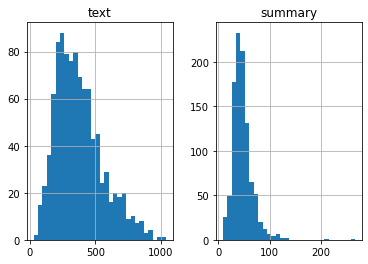

In [27]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
print('Mean of Article Length',sum(text_word_count)/len(text_word_count))
print('Mean of Summary Length',sum(summary_word_count)/len(summary_word_count))
length_df.hist(bins = 30)
plt.show()

In [28]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=375):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.562


In [29]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=46):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.584


In [30]:
max_text_len=375
max_summary_len=46

In [31]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [32]:
#making sure tokens dont appear in the summaries
for summary in df['summary']:
    if 'sostok' in summary:
        print("ERROR")
    if 'eostok' in summary:
        print("ERROR")

In [33]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [34]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [36]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 68.00592091351237
Total Coverage of rare words: 18.027516720657246


In [37]:
#prepare a tokenizer for articles on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [38]:
x_voc

4540

In [39]:
#prepare a tokenizer for headlines on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [40]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 93.75744579461521
Total Coverage of rare words: 48.884938590820944


In [41]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [42]:
y_voc

263

In [43]:
y_tokenizer.word_counts['sostok'], len(y_tr)

(340, 340)

In [44]:
#delete rows that only have start and end tokens
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr, ind, axis=0)
x_tr=np.delete(x_tr, ind, axis=0)

In [45]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [46]:
# from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Attention
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.5.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


## Model
#### Test Dropout

### Set dropout = 0

In [47]:
# Bidirectional LSTM
K.clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(None,))

# embedding layer
enc_emb =  Embedding(x_voc, embedding_dim, trainable=True, name = "enc_embedding")(encoder_inputs)

encoder_lstm1 = Bidirectional(
    LSTM(latent_dim, return_state=True,dropout=0,recurrent_dropout=0),
    name = 'encoder_lstm1')
encoder_outputs, enc_forward_h, enc_forward_c, enc_backward_h, enc_backward_c  = encoder_lstm1(enc_emb)

state_h = Concatenate()([enc_forward_h, enc_backward_h])
state_c = Concatenate()([enc_forward_c, enc_backward_c])
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True, name = 'dec_embedding')
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim*2, return_sequences=True,return_state=True,dropout=0,recurrent_dropout=0)
decoder_outputs1, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)

# Attention layer
attn_layer = Attention(name='attention_layer')
attn_out = attn_layer([decoder_outputs1, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs1, attn_out])

#dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_embedding (Embedding)       (None, None, 100)    454000      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_lstm1 (Bidirectional)   [(None, 600), (None, 962400      enc_embedding[0][0]              
______________________________________________________________________________________________

In [46]:
history=model.fit([x_tr, y_tr[:,:-1]],
                   y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:],
                   epochs=20,
                   callbacks=[es],
                   batch_size=128,
                   validation_data=([x_val,
                                     y_val[:,:-1]],
                                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:,1:]
                                     )
                   )

Epoch 1/20
27/27 [==============================] - 12s 303ms/step - loss: 5.0932 - val_loss: 4.1829
Epoch 2/20
27/27 [==============================] - 7s 272ms/step - loss: 4.2093 - val_loss: 3.9169
Epoch 3/20
27/27 [==============================] - 7s 275ms/step - loss: 4.1065 - val_loss: 3.8854
Epoch 4/20
27/27 [==============================] - 7s 270ms/step - loss: 4.0519 - val_loss: 3.8388
Epoch 5/20
27/27 [==============================] - 7s 270ms/step - loss: 4.0107 - val_loss: 3.8085
Epoch 6/20
27/27 [==============================] - 7s 271ms/step - loss: 3.9553 - val_loss: 3.7985
Epoch 7/20
27/27 [==============================] - 7s 272ms/step - loss: 3.9088 - val_loss: 3.7661
Epoch 8/20
27/27 [==============================] - 7s 274ms/step - loss: 3.8622 - val_loss: 3.7485
Epoch 9/20
27/27 [==============================] - 8s 278ms/step - loss: 3.8098 - val_loss: 3.7160
Epoch 10/20
27/27 [==============================] - 7s 274ms/step - loss: 3.7387 - val_loss: 3.680

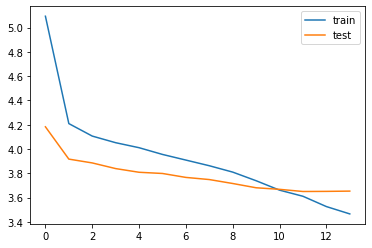

In [48]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [49]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [50]:
#bidirectional
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [51]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [52]:
#bidirectional
for i in range(0,10):
    print("Article:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")

Article: pet loving president bonus dog owners argentina whose state run airline allow small pets flights starting mid january president cristina fernandez announced policy change strange new year social media address starring beloved pooch lolita regularly appears facebook page careful said small pets post says try board mastiff lolita weighs two argentine president cristina fernandez announced small pets allowed fernandez announced state run airline policy change new year address facebook popular accessory status symbol argentina especially capital buenos aires famously pampered one photograph fernandez lolita presidential plane tango posted new year eve attracted likes almost comments hand held ranging commonly seen outdoor cafes wide avenues buenos aires known paris south america european architecture aside fernandez addressed country worrying double inflation contracting gross domestic product repeated sovereign debt said central bank cash reserves rose per cent could keep forced 

Predicted summary:  manchester united has been to be to the club the club the year old has not not not not not not not not not not not not not not not not not not not not not not not not not not not not not not


Article: council include title official forms trans community campaigners say short gender neutral alternative mr mrs ms miss brighton hove city council trans equality panel previously pointed gender part forms allows people say male female said lack options title field provide people identify male female brighton hove city council offer title option official forms following review services trans people yesterday council policy resources committee approved series measures including removal need patients choose male female options check electronic screens arrival gp surgery recommendations include ensuring police staff undertake trans awareness training introducing gender neutral toilets changing rooms suggested council trans equality scrutiny panel brighton gay lesbian bisexua

### Set dropout = 0.2

In [54]:
# Bidirectional LSTM
K.clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(None,))

# embedding layer
enc_emb =  Embedding(x_voc, embedding_dim, trainable=True, name = "enc_embedding")(encoder_inputs)

encoder_lstm1 = Bidirectional(
    LSTM(latent_dim, return_state=True,dropout=0.2,recurrent_dropout=0),
    name = 'encoder_lstm1')
encoder_outputs, enc_forward_h, enc_forward_c, enc_backward_h, enc_backward_c  = encoder_lstm1(enc_emb)

state_h = Concatenate()([enc_forward_h, enc_backward_h])
state_c = Concatenate()([enc_forward_c, enc_backward_c])
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True, name = 'dec_embedding')
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim*2, return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0)
decoder_outputs1, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)

# Attention layer
attn_layer = Attention(name='attention_layer')
attn_out = attn_layer([decoder_outputs1, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs1, attn_out])

#dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_embedding (Embedding)       (None, None, 100)    1957600     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_lstm1 (Bidirectional)   [(None, 600), (None, 962400      enc_embedding[0][0]              
______________________________________________________________________________________________

In [55]:
history=model.fit([x_tr, y_tr[:,:-1]],
                   y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:],
                   epochs=20,
                   callbacks=[es],
                   batch_size=128,
                   validation_data=([x_val,
                                     y_val[:,:-1]],
                                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:,1:]
                                     )
                   )

Epoch 1/20
27/27 [==============================] - 12s 308ms/step - loss: 4.9702 - val_loss: 4.0729
Epoch 2/20
27/27 [==============================] - 7s 277ms/step - loss: 4.2282 - val_loss: 3.9370
Epoch 3/20
27/27 [==============================] - 8s 279ms/step - loss: 4.1136 - val_loss: 3.8711
Epoch 4/20
27/27 [==============================] - 8s 282ms/step - loss: 4.0596 - val_loss: 3.8482
Epoch 5/20
27/27 [==============================] - 7s 275ms/step - loss: 4.0224 - val_loss: 3.8170
Epoch 6/20
27/27 [==============================] - 7s 276ms/step - loss: 3.9731 - val_loss: 3.7850
Epoch 7/20
27/27 [==============================] - 8s 282ms/step - loss: 3.9183 - val_loss: 3.7687
Epoch 8/20
27/27 [==============================] - 8s 282ms/step - loss: 3.8743 - val_loss: 3.7476
Epoch 9/20
27/27 [==============================] - 8s 282ms/step - loss: 3.8261 - val_loss: 3.7379
Epoch 10/20
27/27 [==============================] - 8s 283ms/step - loss: 3.7750 - val_loss: 3.720

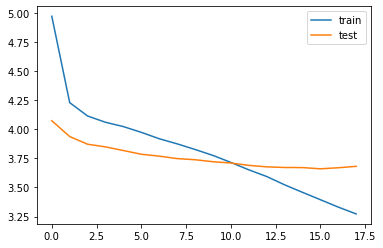

In [56]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [57]:
#bidirectional
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [58]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [59]:
#bidirectional
for i in range(0,10):
    print("Article:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")

Article: pet loving president bonus dog owners argentina whose state run airline allow small pets flights starting mid january president cristina fernandez announced policy change strange new year social media address starring beloved pooch lolita regularly appears facebook page careful said small pets post says try board mastiff lolita weighs two argentine president cristina fernandez announced small pets allowed fernandez announced state run airline policy change new year address facebook popular accessory status symbol argentina especially capital buenos aires famously pampered one photograph fernandez lolita presidential plane tango posted new year eve attracted likes almost comments hand held ranging commonly seen outdoor cafes wide avenues buenos aires known paris south america european architecture aside fernandez addressed country worrying double inflation contracting gross domestic product repeated sovereign debt said central bank cash reserves rose per cent could keep forced 

Predicted summary:  manchester united beat in the end of the world league the league league the world cup in the premier league champions league


Article: council include title official forms trans community campaigners say short gender neutral alternative mr mrs ms miss brighton hove city council trans equality panel previously pointed gender part forms allows people say male female said lack options title field provide people identify male female brighton hove city council offer title option official forms following review services trans people yesterday council policy resources committee approved series measures including removal need patients choose male female options check electronic screens arrival gp surgery recommendations include ensuring police staff undertake trans awareness training introducing gender neutral toilets changing rooms suggested council trans equality scrutiny panel brighton gay lesbian bisexual trans population recommendations passed full council ruth rose s

### Set dropout = 0.4

In [60]:
# Bidirectional LSTM
K.clear_session()

latent_dim = 300
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(None,))

# embedding layer
enc_emb =  Embedding(x_voc, embedding_dim, trainable=True, name = "enc_embedding")(encoder_inputs)

encoder_lstm1 = Bidirectional(
    LSTM(latent_dim, return_state=True,dropout=0.4,recurrent_dropout=0),
    name = 'encoder_lstm1')
encoder_outputs, enc_forward_h, enc_forward_c, enc_backward_h, enc_backward_c  = encoder_lstm1(enc_emb)

state_h = Concatenate()([enc_forward_h, enc_backward_h])
state_c = Concatenate()([enc_forward_c, enc_backward_c])
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True, name = 'dec_embedding')
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim*2, return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)
decoder_outputs1, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)

# Attention layer
attn_layer = Attention(name='attention_layer')
attn_out = attn_layer([decoder_outputs1, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs1, attn_out])

#dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_embedding (Embedding)       (None, None, 100)    1957600     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_lstm1 (Bidirectional)   [(None, 600), (None, 962400      enc_embedding[0][0]              
______________________________________________________________________________________________

In [61]:
history=model.fit([x_tr, y_tr[:,:-1]],
                   y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:],
                   epochs=20,
                   callbacks=[es],
                   batch_size=128,
                   validation_data=([x_val,
                                     y_val[:,:-1]],
                                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:,1:]
                                     )
                   )

Epoch 1/20
27/27 [==============================] - 12s 315ms/step - loss: 5.0224 - val_loss: 4.1791
Epoch 2/20
27/27 [==============================] - 8s 290ms/step - loss: 4.3594 - val_loss: 4.0346
Epoch 3/20
27/27 [==============================] - 8s 281ms/step - loss: 4.1479 - val_loss: 3.8994
Epoch 4/20
27/27 [==============================] - 8s 282ms/step - loss: 4.0700 - val_loss: 3.8581
Epoch 5/20
27/27 [==============================] - 8s 281ms/step - loss: 4.0397 - val_loss: 3.8465
Epoch 6/20
27/27 [==============================] - 8s 281ms/step - loss: 4.0048 - val_loss: 3.8058
Epoch 7/20
27/27 [==============================] - 8s 281ms/step - loss: 3.9534 - val_loss: 3.7903
Epoch 8/20
27/27 [==============================] - 8s 282ms/step - loss: 3.9124 - val_loss: 3.7694
Epoch 9/20
27/27 [==============================] - 8s 285ms/step - loss: 3.8699 - val_loss: 3.7494
Epoch 10/20
27/27 [==============================] - 8s 285ms/step - loss: 3.8122 - val_loss: 3.725

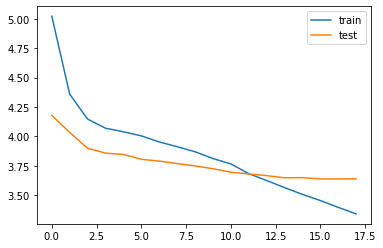

In [62]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [63]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [64]:
#bidirectional
for i in range(0,10):
    print("Article:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")

Article: pet loving president bonus dog owners argentina whose state run airline allow small pets flights starting mid january president cristina fernandez announced policy change strange new year social media address starring beloved pooch lolita regularly appears facebook page careful said small pets post says try board mastiff lolita weighs two argentine president cristina fernandez announced small pets allowed fernandez announced state run airline policy change new year address facebook popular accessory status symbol argentina especially capital buenos aires famously pampered one photograph fernandez lolita presidential plane tango posted new year eve attracted likes almost comments hand held ranging commonly seen outdoor cafes wide avenues buenos aires known paris south america european architecture aside fernandez addressed country worrying double inflation contracting gross domestic product repeated sovereign debt said central bank cash reserves rose per cent could keep forced 

Predicted summary:  manchester united beat in the end of the world league the league league the world cup in the premier league champions league


Article: council include title official forms trans community campaigners say short gender neutral alternative mr mrs ms miss brighton hove city council trans equality panel previously pointed gender part forms allows people say male female said lack options title field provide people identify male female brighton hove city council offer title option official forms following review services trans people yesterday council policy resources committee approved series measures including removal need patients choose male female options check electronic screens arrival gp surgery recommendations include ensuring police staff undertake trans awareness training introducing gender neutral toilets changing rooms suggested council trans equality scrutiny panel brighton gay lesbian bisexual trans population recommendations passed full council ruth rose s

The results were less overfit in dropout = 0.2 than dropout = .0. But the difference between dropout = 0.2 and 0.4 were not very different.